In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import *
from sympy import *

## Quaternion (Euler Parameter) Attitude description

The quaternion attitude coordinate set (i.e: {$q_0, q_1, q_2, q_3$}) provides for a redundant, non-singular attitude description.

The directional cosine matrix is defined as:

$$
[C(q_0, q_1, q_2, q_3)] = \left[\begin{array}{cc} 
q_0^2 + q_1^2 - q_2^2 - q_3^2 & 2(q_1q_2 + q_0q_3) & 2(q_1q_3 - q_0q_2)\\
2(q_1q_2 - q_0q_3) & q_0^2 - q_1^2 + q_2^2 - q_3^2 & 2(q_2q_3 + q_0q_1) \\
2(q_1q_3 + q_0q_2) & 2(q_2q_3 - q_0q_1) & q_0^2 - q_1^2 - q_2^2 + q_3^2 
\end{array}\right] 
$$

In [3]:
#Given a set of quaternions i.e (q_0, q_1, q_2, q_3) OR (phi, e_1, e_2, e_3) the corresponding DCM can be established.

def Q_to_DCM(q):
    
    q_0, q_1, q_2, q_3 = q
    
    return np.array([[q_0**2 + q_1**2 - q_2**2 - q_3**2, 2 * (q_1 * q_2 + q_0 * q_3), 2 * (q_1 * q_3 - q_0 * q_2)],
                     [2 * (q_1 * q_2 - q_0 * q_3), q_0**2 - q_1**2 + q_2**2 - q_3**2, 2 * (q_2 * q_3 + q_0 * q_1)],
                     [2 * (q_1 * q_3 + q_0 * q_2), 2 * (q_2 * q_3 - q_0 * q_1), q_0**2 - q_1**2 - q_2**2 + q_3**2]],
                     dtype = np.float64)


In [4]:
q = np.array([0.235702, 0.471405, -0.471405, 0.707107])

print("Directional Cosine Matrix")

print(Q_to_DCM(q))

Directional Cosine Matrix
[[-0.44444488 -0.11111228  0.88888975]
 [-0.77777842 -0.44444488 -0.44444535]
 [ 0.44444535 -0.88888975  0.11111039]]


The inverse mapprings from the DCM to the corresponding quaternion set can be achived by Stanley's algorithm:

$$
q_0^2 = \frac{1}{4} (1 + Trace[C(q_0, q_1, q_2, q_3)])
$$
$$
q_1^2 = \frac{1}{4} (1 + 2C_{11} -Trace[C(q_0, q_1, q_2, q_3)])
$$
$$
q_2^2 = \frac{1}{4} (1 + 2C_{22} - Trace[C(q_0, q_1, q_2, q_3)])
$$
$$
q_3^2 = \frac{1}{4} (1 + 2C_{33} - Trace[C(q_0, q_1, q_2, q_3)])
$$

The largest $q_i^2$ is empirically chosen and determined by taking its square root, whilst the remaining $q_i's$ are discoved via these general relations:

$$
q_0q_1 = (C_{23} - c_{32})/4
$$
$$
q_0q_2 = (C_{31} - c_{13})/4
$$
$$
q_0q_3 = (C_{12} - c_{21})/4
$$
$$
q_2q_3 = (C_{23} - c_{32})/4
$$
$$
q_3q_1 = (C_{31} - c_{13})/4
$$
$$
q_1q_2 = (C_{12} - c_{21})/4
$$

In [ ]:
#Using Sheppard's/Stanley's Algorithm, one can obtain the Quaternion elements corresponding to a DCM.

def DCM_to_Q(C):
    
    q = []
    
    q_0_2 = 0.25 * (1 + C.trace())
    q_1_2 = 0.25 * (1 + 2 * C[0][0] - C.trace())
    q_2_2 = 0.25 * (1 + 2 * C[1][1] - C.trace())
    q_3_2 = 0.25 * (1 + 2 * C[2][2] - C.trace())
    
    q.extend([q_0_2, q_1_2, q_2_2, q_3_2])
    
    if max(q) == q[0]:
        
        Q = []
        
        q_0 = np.sqrt(q_0_2)
        q_1 = (C[1][2] - C[2][1]) / (4 * q_0)
        q_2 = (C[2][0] - C[0][2]) / (4 * q_0)
        q_3 = (C[0][1] - C[1][0]) / (4 * q_0)
        
        Q.extend([q_0, q_1, q_2, q_3])
           
    elif max(q) == q[1]:
        
        Q = []
        
        q_1 = np.sqrt(q_1_2)
        q_0 = (C[1][2] - C[2][1]) / (4 * q_1)
        q_2 = (C[0][1] + C[1][0]) / (4 * q_1)
        q_3 = (C[2][0] + C[0][2]) / (4 * q_1)
        
        Q.extend([q_0, q_1, q_2, q_3])
    
    elif max(q) == q[2]:
        
        Q = []
        
        q_2 = np.sqrt(q_2_2)
        q_0 = (C[2][0] - C[0][2]) / (4 * q_2)
        q_1 = (C[0][1] + C[1][0]) / (4 * q_2)
        q_3 = (C[1][2] + C[2][1]) / (4 * q_2)
        
        Q.extend([q_0, q_1, q_2, q_3])
        
    elif max(q) == q[3]:
        
        Q = []
        
        q_3 = np.sqrt(q_3_2)
        q_0 = (C[0][1] - C[1][0]) / (4 * q_3)
        q_1 = (C[2][0] + C[0][2]) / (4 * q_3)
        q_2 = (C[1][2] + C[2][1]) / (4 * q_3) 
        
        Q.extend([q_0, q_1, q_2, q_3])

    return Q


In [ ]:
C = np.array([[-0.529403, -0.467046,  0.708231],
              [-0.474115, -0.529403, -0.703525],
              [ 0.703525, -0.708231, 0.0588291]])

print(DCM_to_Q(C))

In [ ]:
#Quaternion Addition.

"""
Example: Given q_B/N and q_F/B what is q_F/N?
This is no other than: [FN(q)] = [FB(q")][BN(q')] using DCM properties.
Also one can find:     [BN(q')] = [FB(q")]^T[FN(q)]
"""

def quaternion_addition(qp, qdp):
    
    qp_0, qp_1, qp_2, qp_3 = qp
    
    qdp_0, qdp_1, qdp_2, qdp_3 = qdp
    
    q_dprime = np.array([[qdp_0, -qdp_1, -qdp_2, -qdp_3],
                         [qdp_1,  qdp_0,  qdp_3, -qdp_2],
                         [qdp_2, -qdp_3,  qdp_0,  qdp_1],
                         [qdp_3,  qdp_2, -qdp_1,  qdp_0]],
                         dtype = np.float64) 
    
    q_prime = np.array([qp_0, qp_1, qp_2, qp_3])
    
    
    #[FN(q)] = [FB(q")][BN(q')]
    q = q_dprime.dot(q_prime)
    
    """If one needs to find q_prime (q') when given q and q_dprime (q"), just transpose q_drprime 
    and find its dot product with q using q_prime as a placeholder for q."""
    
    #Therefore: [BN(q')] = [FB(q")]^T[FN(q)]
    transp_qdp = q_dprime.T
    
    q_p = transp_qdp.dot(q_prime)
    
    return q, q_p

In [ ]:
#One is given q_prime and q_dprime, therefore solving for q we call q()[0]:

qp = [0.774597, 0.258199, 0.516398, 0.258199]
qdp = [0.359211, 0.898027, 0.179605, 0.179605]

print(q(qp, qdp)[0])

In [ ]:
#One is given q and q_dprime, therefore solving for q_prime we call q()[1]:

q_ = [0.359211, 0.898027, 0.179605, 0.179605]
qdp = [-0.377964, 0.755929, 0.377964, 0.377964]

print(q(q_, qdp)[1])

In [ ]:
"""
In order to express in terms (q") one has to transmutate [FN(q)] above.

Example: Given q_B/N and q_F/N what is q_F/B?
This is once again no other than: [FB(q")] = [BN(q')][FN(q)] using DCM properties.
Also one can find:     [FN(q)] = [BN(q')]^T[FB(q")]
"""


def q_transmuted(qp, qdp):
    
    qp_0, qp_1, qp_2, qp_3 = qp
    
    qdp_0, qdp_1, qdp_2, qdp_3 = qdp
    
    q_prime = np.array([[qp_0,  -qp_1, -qp_2, -qp_3],
                         [qp_1,  qp_0, -qp_3,  qp_2],
                         [qp_2, -qp_3,  qp_0, -qp_1],
                         [qp_3, -qp_2,  qp_1,  qp_0]],
                         dtype = np.float64)
    
    q_dprime = np.array([qdp_0, qdp_1, qdp_2, qdp_3])
    
    #Solving for q:
    q = q_prime.dot(q_dprime)
    
    #Solving for q_dp using q_dprime as a placeholder for q unprimed:
    
    transp_qp = q_prime.T
    
    q_dp = transp_qp.dot(q_dprime)
    
    return q, q_dp

## Quaternion Kinematic Differential Equations:

$$
\left(\begin{array}{cc} 
\dot{\beta_0}\\
\dot{\beta_1}\\
\dot{\beta_2}\\
\dot{\beta_3}
\end{array}\right)
=
\frac{1}{2}
\left[\begin{array}{cc} 
\beta_0 & -\beta_1 & -\beta_2 & -\beta_3\\
\beta_1 & \beta_0 & -\beta_3 & \beta_2\\
\beta_2 & \beta_3 & \beta_0 & -\beta_1\\
\beta_3 & -\beta_2 & \beta_1 & \beta_0
\end{array}\right]
.
\left(\begin{array}{cc} 
0\\
\omega_1\\
\omega_2\\
\omega_3
\end{array}\right) 
$$



Which can be compactly written as:

$$
\dot{\beta} = \frac{1}{2}[B(\beta)]\omega
$$

In [4]:
#Initial Conditions:
dt = 0.001
T = 42
N = int(T/dt)
y0 = np.array([0.408248, 0., 0.408248, 0.816497])
t = 0

"""
A RK4 integrator is created and compared to scipy's odeint module for determining solutions to the 
Quaternion kinematic differential equations. 

"""


def Quaternion_Kinematic_Eq(t, y):
    
    q_0, q_1, q_2, q_3 = y
    
    Q = np.array([[q_0, -q_1, -q_2, -q_3],
                  [q_1,  q_0, -q_3,  q_2],
                  [q_2,  q_3,  q_0, -q_1],
                  [q_3, -q_2,  q_1,  q_0]])
    
    w = np.array([0, sin(0.1 * t), 0.01, cos(0.1 * t)])
    
    k = np.deg2rad(20)
    
    dQdt = np.dot(Q, w) * k * 1/2
    
    return dQdt



def RK4(f, dt, y0, t):
    
    y_plot = np.zeros((N-1,4))
    t_plot = []
                      
    for i in range(0, N-1): 
    
        f1 = f(t, y0)
        f2 = f(t + (dt / 2), y0 + (dt / 2) * f1)
        f3 = f(t + (dt / 2), y0 + (dt / 2) * f2)
        f4 = f(t + dt, y0 + dt * f3)
    
        y0 = y0 + (dt / 6) * (f1 + 2 * f2 + 2 * f3 + f4)
        
        t = t + dt
        
        y_plot[i] = y0; t_plot.append(t)
    
    return y_plot, t_plot


solution = RK4(Quaternion_Kinematic_Eq, dt, y0, t)

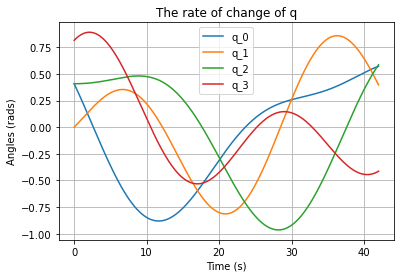

In [5]:
plt.plot(solution[1], solution[0][:,0], label = "q_0")
plt.plot(solution[1], solution[0][:,1], label = "q_1")
plt.plot(solution[1], solution[0][:,2], label = "q_2")
plt.plot(solution[1], solution[0][:,3], label = "q_3")
plt.legend()

plt.title("The rate of change of q")
plt.xlabel("Time (s)")
plt.ylabel("Angles (rads)")
plt.grid(true)


In [6]:
#Finding the norm "Sqrt(q_1^2 + q_2^2 + q_3^2)" at 42s.

print(sqrt((solution[0][:,1][-1])**2 + (solution[0][:,2][-1])**2 + (solution[0][:,3][-1])**2 ))

0.820106863707170


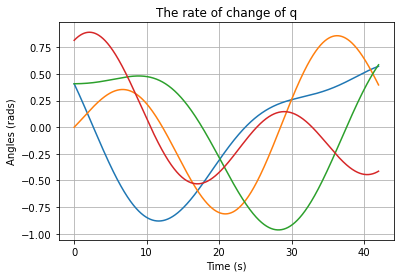

In [7]:
#Comparision with odeint.
def Quaternion_Kinematic_Eq_(y, t):
    
    q_0, q_1, q_2, q_3 = y
    
    Q = np.array([[q_0, -q_1, -q_2, -q_3],
                  [q_1,  q_0, -q_3,  q_2],
                  [q_2,  q_3,  q_0, -q_1],
                  [q_3, -q_2,  q_1,  q_0]], dtype=np.float64)
    
    w = np.array([0, sin(0.1 * t), 0.01, cos(0.1 * t)], dtype=np.float64)
    
    k = np.deg2rad(20)
    
    dQdt = np.dot(Q, w) * k * 1/2
    
    return dQdt

t_ = np.linspace(0, 42, 1000)
y0_ = np.array([0.408248, 0., 0.408248, 0.816497])

soln = odeint(Quaternion_Kinematic_Eq_, y0_, t_)

plt.plot(t_, soln[:,0], t_, soln[:,1], t_, soln[:,2], t_, soln[:,3])


plt.title("The rate of change of q")
plt.xlabel("Time (s)")
plt.ylabel("Angles (rads)")
plt.grid(true)

In [16]:
print(sqrt((soln[:,1][-1])**2 + (soln[:,2][-1])**2 + (soln[:,3][-1])**2 ))

0.820090146577301
